# <center>CHE1147 Data Mining in Engineering</center>

## <center>Assignment 6</center>


#### <div style="text-align: right">Bowen Xu</div>
#### <div style="text-align: right">1006411786</div>    

In [1]:
import  pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, f1_score

In [2]:
#read kaggle data
kaggle = pd.read_csv('Retail_Data_Response.csv')

In [3]:
#read monthly data
mth_rolling_features = pd.read_excel('mth_rolling_features.xlsx')
mth_day_counts = pd.read_excel('mth_day_counts.xlsx')
days_since_last_txn = pd.read_excel('days_since_last_txn.xlsx')

In [4]:
mth_rolling_features.drop('Unnamed: 0',axis=1,inplace=True)
mth_day_counts.drop('Unnamed: 0',axis=1,inplace=True)
days_since_last_txn.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df_monthly = pd.merge(mth_rolling_features, mth_day_counts,on=['CLNT_NO','ME_DT'])\
               .merge(days_since_last_txn,on=['CLNT_NO','ME_DT'])\
               .merge(kaggle.rename(columns={'customer_id':'CLNT_NO'}),on='CLNT_NO')

In [6]:
# fill missing values with 0s
df_monthly.fillna(0,inplace=True)

In [7]:
# separate features and targets
X_monthly = df_monthly.drop(['response','CLNT_NO','ME_DT'], axis=1)
y_monthly = df_monthly['response'].astype(int)

#### 1. Split the train/test sets with 9:1 ratio This split should give you approximately 291k/32k samples in train/test set, respectively.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_monthly, y_monthly, test_size=0.1, random_state=1147)

In [9]:
len(X_train)

291193

In [10]:
len(X_test)

32355

#### 2. Initialize  and  create  a  for  loop  in  which  you  take  N  samples  (e.g.   50),  build  a  tree model with the N samples and evaluate the test set AUC. Repeat the sampling process 10 times and append the test set AUC. 

In [11]:
def run_size(size):
    
    test_auc = []
    
    for _ in range(10):

        X_train_temp = X_train.sample(n = size)
        idx = X_train_temp.index
        y_train_temp = y_train[idx]

        clf = DecisionTreeClassifier(max_depth = 6, random_state = 1147, class_weight='balanced')
        clf.fit(X_train_temp, y_train_temp)

        scores_test  = clf.predict_proba(X_test)[:,1]
        fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
        test_auc.append(auc(fpr_test, tpr_test))

    return test_auc

In [12]:
results = run_size(50)
results = pd.DataFrame(results,columns=['Test AUC'])
results

,Test AUC
0,0.519827
1,0.532093
2,0.515241
3,0.488978
4,0.499940
5,0.483410
6,0.525813
7,0.504277
8,0.527091
9,0.525186


In [13]:
print('Mean of test AUC =',results.mean().values[0])
print('Standard deviation of test AUC =',results.std().values[0])

Mean of test AUC = 0.5121854408552224
Standard deviation of test AUC = 0.0170622145916475


#### 3. Repeat the procedure you performed in the previous step for different sample size N

In [14]:
sample_sizes = [50, 100, 500, 1000, 2000, 5000, 10000, 50000, 75000, 100000, 150000, 200000, 250000]

In [15]:
df_auc = pd.DataFrame(index=['# {}'.format(i) for i in list(range(1,11))], columns=['sample size = {}'.format(size) for size in sample_sizes])

In [16]:
for i in range(len(sample_sizes)):
    df_auc.iloc[:,i] = run_size(sample_sizes[i])

In [17]:
df_auc

,sample size = 50,sample size = 100,sample size = 500,sample size = 1000,sample size = 2000,sample size = 5000,sample size = 10000,sample size = 50000,sample size = 75000,sample size = 100000,sample size = 150000,sample size = 200000,sample size = 250000
# 1,0.521185,0.514251,0.552247,0.525786,0.569470,0.598304,0.601312,0.631718,0.641670,0.638519,0.645044,0.644118,0.642804
# 2,0.509691,0.514580,0.523421,0.483942,0.556709,0.593447,0.607649,0.635673,0.638744,0.637384,0.646364,0.644949,0.647300
# 3,0.511673,0.506195,0.497796,0.569101,0.549912,0.586833,0.603449,0.633101,0.641914,0.641978,0.641984,0.640805,0.646312
# 4,0.538643,0.521307,0.537860,0.521871,0.566458,0.568983,0.606554,0.634737,0.640422,0.641751,0.640887,0.641135,0.645534
# 5,0.511051,0.489865,0.543057,0.515535,0.559443,0.605855,0.621636,0.632229,0.638865,0.640861,0.641820,0.641214,0.644513
# 6,0.507163,0.513328,0.521853,0.500601,0.534454,0.581352,0.606701,0.637610,0.639161,0.639325,0.640111,0.645420,0.643482
# 7,0.489649,0.514401,0.480515,0.562708,0.566408,0.575665,0.600213,0.634937,0.634551,0.639889,0.641180,0.645972,0.643755
# 8,0.538886,0.493724,0.514707,0.571543,0.555958,0.584981,0.606434,0.634242,0.638235,0.636490,0.642551,0.645606,0.643632
# 9,0.504884,0.498176,0.533835,0.577173,0.547776,0.598875,0.606415,0.632777,0.634556,0.646176,0.639963,0.645463,0.643439
# 10,0.485420,0.506455,0.527361,0.528717,0.539544,0.575865,0.601400,0.636696,0.635541,0.639942,0.643603,0.644639,0.645102


#### 4. Build a table that contains the values of:
- Sample size N
- Test AUC mean
- Test AUC standard deviation

In [18]:
df_result = pd.DataFrame(df_auc.T.mean(axis=1),columns=['Test AUC mean'])

df_result['Test AUC standard deviation'] = df_auc.T.std(axis=1)

df_result

,Test AUC mean,Test AUC standard deviation
sample size = 50,0.511825,0.017648
sample size = 100,0.507228,0.010315
sample size = 500,0.523265,0.021408
sample size = 1000,0.535698,0.032499
sample size = 2000,0.554613,0.011700
sample size = 5000,0.587016,0.011921
sample size = 10000,0.606176,0.006066
sample size = 50000,0.634372,0.001939
sample size = 75000,0.638366,0.002704
sample size = 100000,0.640231,0.002732


#### 5. Using the matplotlib function errorbar,  plot the model performance captured in the test AUC mean and standard deviation as a function of the sample size.  From this plot, can you estimate what is the minimum number of samples needed to model the behaviour adequately?

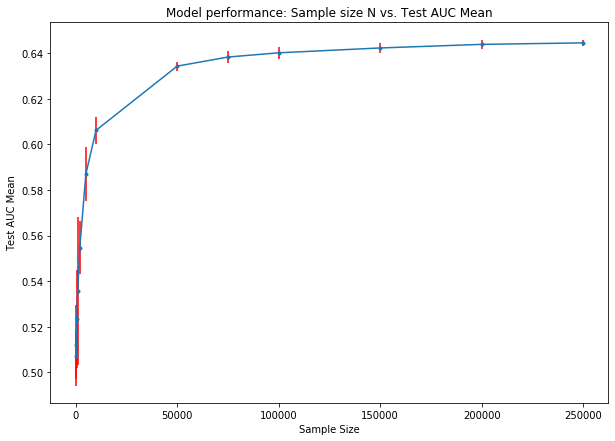

In [19]:
plt.figure(figsize=(10, 7))
plt.errorbar(sample_sizes, df_result['Test AUC mean'] , df_result['Test AUC standard deviation'], marker = '.', ecolor = 'red')
plt.xlabel('Sample Size')
plt.ylabel('Test AUC Mean')
plt.title('Model performance: Sample size N vs. Test AUC Mean')
plt.show()

From the graph, it clearly shows that the mean test AUC scores are increasing drastically when the sample size is lower than 50000 and the standard deviations are fluctuating; when the sample size goes from 50000 to 100000, the trend starts to be more stable but the AUC scores are still making improvements; as the sample size is greater than 150000, the mean AUC scores are almost horizontal which means the performance of the model does not get better when increase the sample size further. Therefore, the minimum sample size for this decision tree model to behave well is <b style='color:red'>150000.